# Import Libraries

In [1]:
import os  # Interact with the operating system.
import sys  # Read system parameters.
import warnings  # Suppress warnings
from time import time  # Calculate training time.

import folium  # Plot values on a map.
import matplotlib  # Create 2D charts.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import sklearn  # Perform data mining and analysis.
import yellowbrick  # Visualize elbow and silhouette plots.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings("ignore")

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- Folium {}".format(folium.__version__))
print("- Yellowbrick {}".format(yellowbrick.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- Folium 0.18.0
- Yellowbrick 1.5
- scikit-learn 1.3.2



## Load the Dataset

To analyze the price of a home  through multiple inputs in King County, load the dataset into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized with pandas.

In [2]:
# Load the dataset.
PATH = os.path.join(".", "housing_data")
print("Data files in this project:", os.listdir(PATH))

data = os.path.join(PATH, "kc_house_data_prep.pickle")
datanorm = os.path.join(PATH, "kc_house_data_prep_norm.pickle")
df = pd.read_pickle(data)
dfnorm = pd.read_pickle(datanorm)
print("Loaded {} records from {}.".format(len(df), data))
print("Loaded {} records from {}.".format(len(dfnorm), datanorm))

Data files in this project: ['kc_house_data_prep_norm.pickle', 'kc_house_data_prep.pickle']
Loaded 21609 records from ./housing_data/kc_house_data_prep.pickle.
Loaded 21609 records from ./housing_data/kc_house_data_prep_norm.pickle.


The pickle files contain the King County housing data. For initial visualization,  the non-normalized version is utilized, while the normalized version will be employed for training a candidate model.

## Relearn the Dataset

#### View features and data types

Column Labels:
- **id**—Unique identifier for each house sold.
- **date**—Date of the house's most recent sale.
- **price**—Price the house most recently sold for.
- **bedrooms**—Number of bedrooms in the house.
- **bathrooms**—Number of bathrooms. A room with a toilet but no shower is counted as 0.5.
- **sqft_living**—Square footage of the house's interior living space.
- **sqft_lot**—Square footage of the lot on which the house is located.
- **floors**—Number of floor levels in the house.
- **waterfront**—Whether the property borders on or contains a body of water. (0 = not waterfront, 1 =
waterfront)
- **view**—An index from 0 to 4 representing the subjective quality of the view from the property. The
higher the number, the better the view.
- **condition**—An index from 1 to 5 representing the subjective condition of the property. The higher
the number, the better the condition.
- **grade**—An index from 0 to 14 representing the quality of the building's construction and design.
The higher the number, the better the grade.
- **sqft_above**The square footage of the interior housing space that is above ground level.
- **sqft_basement**—The square footage of the interior housing space that is below ground level.
- **yr_built**—The year the house was initially built.
- **yr_built_group**—
- **yr_built_encoded**—
- **yr_renovated**—The year of the house's last renovation.
- **yr_ren_group**—
- **yr_ren_encoded**—
- **zipcode**—What zipcode area the house is located within.
- **lat**—Latitude of the house's location.
- **long**—Longitude of the house's location.
- **sqft_living15**—The square footage of interior housing living space for the nearest 15 neighbors.
- **sqft_lot15**—The square footage of the lan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21617
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21609 non-null  int64         
 1   date              21609 non-null  datetime64[ns]
 2   price             21609 non-null  float64       
 3   bedrooms          21609 non-null  int64         
 4   bathrooms         21609 non-null  float64       
 5   sqft_living       21609 non-null  int64         
 6   sqft_lot          21609 non-null  int64         
 7   floors            21609 non-null  float64       
 8   waterfront        21609 non-null  int64         
 9   view              21609 non-null  int64         
 10  condition         21609 non-null  int64         
 11  grade             21609 non-null  int64         
 12  sqft_above        21609 non-null  int64         
 13  sqft_basement     21609 non-null  int64         
 14  yr_built          21609 non

In [4]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built_group  yr_built_encoded  \
0      5650     1.0           0     0  ...       1941–1960                 2   
1      7242     2.0           0     0  ...       1941–1960                 2   
2     10000     1.0           0     0  ...       1921–1940                 1   
3      5000     1.0           0     0  ...       1961–1980                 3   
4      8080     1.0           0     0  ...       1981–2001                 4   

   yr_renovated  yr_ren_group  yr_ren_encoded zipcode      lat     long  \
0             0           N/A               0   98178  47.5112 -122.257   
1          1991     1975–1994               3   98125  47.7210 -122.319   
2             0           N/A               0   98028  47.7379 -122.233   
3             0           N/A               0   98136  47.5208 -122.393   
4             0           N/A               0   98074  47.6168 -122.045   

  sqft_living15  sqft_lot15  
0          1340        5650  
1          1690        7639  
2          2720        8062  
3          1360        5000  
4          1800        7503  

[5 rows x 25 columns]

**Spotlights** 

Each row in the dataset represents a house, characterized by various attributes such as the number of bedrooms, bathrooms, and total square footage. While the price was the primary target in your supervised learning tasks, this unsupervised project will shift the focus to analyzing other features of the houses.

## Data Characteristics - Statistical Measures

**Descriptive summary statistics**

In [5]:
with pd.option_context("float_format", "{:.2f}".format):
    print(df.describe())

                 id                           date      price  bedrooms  \
count      21609.00                          21609   21609.00  21609.00   
mean  4579845174.17  2014-10-29 04:59:32.511453696  539156.72      3.37   
min      1000102.00            2014-05-02 00:00:00   75000.00      0.00   
25%   2123049175.00            2014-07-22 00:00:00  321500.00      3.00   
50%   3904930240.00            2014-10-16 00:00:00  450000.00      3.00   
75%   7308900100.00            2015-02-17 00:00:00  645000.00      4.00   
max   9900000190.00            2015-05-27 00:00:00 5570000.00     11.00   
std   2876363064.42                            NaN  358610.69      0.91   

       bathrooms  sqft_living   sqft_lot   floors  waterfront     view  ...  \
count   21609.00     21609.00   21609.00 21609.00    21609.00 21609.00  ...   
mean        2.11      2078.73   15105.03     1.49        0.01     0.23  ...   
min         0.00       290.00     520.00     1.00        0.00     0.00  ...   
25%     

**Summarize the Most Common Values**

In [6]:
features_to_summarize = [
    "view",
    "waterfront",
    "grade",
    "zipcode",
    "bedrooms",
    "bathrooms",
    "floors",
    "sqft_living",
    "sqft_lot",
    "condition",
]
df[features_to_summarize].mode()

view  waterfront  grade  zipcode  bedrooms  bathrooms  floors  sqft_living  \
0     0           0      7    98103         3        2.5     1.0         1300   

   sqft_lot  condition  
0      5000          3

**The typical house**:
- Does not have a "view" and is not on the waterfront.
- Has a grade of 7.
- Has a zipcode of 98103.
- Has 3 bedrooms, 2.5 bathrooms, and 1 floor level.
- Has a single story.
- Has 1300 sqaure feet  of living space.
- Has an above average condition.

## Develop a New Price Per Sq-Foot Metric

The next step develops a pricing feature that calculates the cost per square foot by utilizing the price and the living square footage.

In [7]:
df["price_per_sqft"] = round(df["price"] / df["sqft_living"], 2)
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built_encoded  yr_renovated  \
0      5650     1.0           0     0  ...                 2             0   
1      7242     2.0           0     0  ...                 2          1991   
2     10000     1.0           0     0  ...                 1             0   
3      5000     1.0           0     0  ...                 3             0   
4      8080     1.0           0     0  ...                 4             0   

   yr_ren_group  yr_ren_encoded  zipcode      lat     long  sqft_living15  \
0           N/A               0    98178  47.5112 -122.257           1340   
1     1975–1994               3    98125  47.7210 -122.319           1690   
2           N/A               0    98028  47.7379 -122.233           2720   
3           N/A               0    98136  47.5208 -122.393           1360   
4           N/A               0    98074  47.6168 -122.045           1800   

  sqft_lot15  price_per_sqft  
0       5650          188.05  
1       7639          209.34  
2       8062          233.77  
3       5000          308.16  
4       7503          303.57  

[5 rows x 26 columns]

**Spotlights** 

The final column in the data frame presents the price_per_sqft attribute, which was derived by calculating the ratio of price to sqft_living. This newly created feature will be utilized in the visualization of the clusters.

## Cluster Every Dataset Row - Using K-Means
Employ a *k*-means algorithm to categorize each row within the dataset into distinct clusters.

In [8]:
# Generate clusters.
def generate_clusters(cluster_count, X):
    kmeansmodel = KMeans(n_clusters=cluster_count, init="k-means++", random_state=42)

    kmeansmodel.fit(X)
    clusters = kmeansmodel.predict(X)

    # Return the original data frame with the clusters appended as a new column.
    return clusters


print("The function to assign clusters using a k-means model has been defined.")

The function to assign clusters using a k-means model has been defined.


**Create the cluster assignments and incorporate them into the original dataset.**

To begin, organize the data based on latitude and longitude coordinates. This serves as an initial phase to evaluate the effectiveness of the clustering process.Create four distinct clusters for the housing data and incorporate these clusters into a new column within the original dataset. Finally, display a sample of the dataset rows that now include the newly added cluster information.

In [9]:
X = df[["lat", "long"]]

clusters = generate_clusters(4, X)

# Incorporate the clusters into a new column in the original dataset.
clustered_houses = df.assign(cluster=clusters)

# Preview clusters added.
clustered_houses.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  yr_ren_group  \
0      5650     1.0           0     0  ...             0           N/A   
1      7242     2.0           0     0  ...          1991     1975–1994   
2     10000     1.0           0     0  ...             0           N/A   
3      5000     1.0           0     0  ...             0           N/A   
4      8080     1.0           0     0  ...             0           N/A   

   yr_ren_encoded  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0    98178  47.5112 -122.257           1340        5650   
1               3    98125  47.7210 -122.319           1690        7639   
2               0    98028  47.7379 -122.233           2720        8062   
3               0    98136  47.5208 -122.393           1360        5000   
4               0    98074  47.6168 -122.045           1800        7503   

  price_per_sqft  cluster  
0         188.05        1  
1         209.34        0  
2         233.77        0  
3         308.16        1  
4         303.57        3  

[5 rows x 27 columns]

**Spotlights** 

The cluster column located at the end of the data frame indicates the specific cluster assignment for each data example, which can be either 0, 1, 2, or 3.

### Examine Cluster Distributions

In [10]:
def get_cluster_distributions(cluster, size):
    for i in range(size):
        houses_in_cluster = len(cluster[cluster["cluster"] == i])
        print("Number of houses in cluster {} = {}".format(i, houses_in_cluster))


print("The function to generate cluster distributions has been defined.")

The function to generate cluster distributions has been defined.


**Generate the distributions.**

In [11]:
get_cluster_distributions(clustered_houses, 4)

Number of houses in cluster 0 = 7438
Number of houses in cluster 1 = 5067
Number of houses in cluster 2 = 4285
Number of houses in cluster 3 = 4819


**Spotlights** 

Each cluster comprises several thousand homes, with cluster 1 housing the highest number.

## Map Clusters of Houses by Location

To prevent cluttering the visualization, display only every nth house. Begin by creating a base map focused on King County then identify the price of the most expensive property. Represent the homes according to their price points, next. Incorporate interactive pop-up text that reveals details upon clicking each location. Generate a heat map to illustrate density around each cluster of homes afterwards. Finally, include a title for the map to provide context.

In [12]:
from folium.plugins import HeatMap


def map_datapoints(clustered_houses_data, map_title):
    """Shows clusters on a map of King County."""

    # Only display every nth house.
    number_of_homes = 20
    houses_set_mapping = clustered_houses_data.sort_values(
        by=["price"], ascending=False
    )[::number_of_homes]

    # Create a King County base map using Folium.
    basemap = folium.Map(
        location=[47.5300, -122.2000],
        control_scale=True,
        max_zoom=20,
        zoom_start=10,
        zoom_control=True,
    )

    # Identify the price of the most expensive property.
    maximum_price = clustered_houses_data.loc[clustered_houses_data["price"].idxmax()][
        "price"
    ]

    """Iterate through every 20th row of the dataset and represent the homes according to their price points"""
    for index, row in houses_set_mapping.iterrows():

        # Incorporate interactive pop-up text details.
        details_popup_text = "<br>".join(
            [
                "King&nbsp;County&nbsp;Housing&nbsp;Sales&nbsp;Data",
                "Price:&nbsp;${:,.0f}",
                "Cluster:&nbsp;{:.0f}",
                "Bedrooms:&nbsp;{:.0f}",
                "Bathrooms:&nbsp;{:.0f}",
                "Sqft&nbsp;Living:&nbsp;{:,.0f}",
                "Location:&nbsp;[{:.3f},{:.3f}]",
            ]
        )

        details_popup_text = details_popup_text.format(
            row["price"],
            row["cluster"],
            row["bedrooms"],
            row["bathrooms"],
            row["sqft_living"],
            row["lat"],
            row["long"],
        )

        cluster_value = int(row["cluster"])
        scaling_value = row["price"] / maximum_price  # 1.0 for highest price.

        folium.CircleMarker(
            [row["lat"], row["long"]],
            radius=25 * scaling_value,
            weight=3,
            fill=True,
            fill_color="#000000",
            color="#0000FF",
            fill_opacity=0.8,
            opacity=0.8,
            popup=details_popup_text,
        ).add_to(basemap)

    """Illustrate density around each cluster of homes using a Heatmap and display it along the dimensions of latitude and
    longitude, using the mean price per square feet of each cluster as a summary statistic."""
    cluster_maximum = (
        clustered_houses_data.loc[clustered_houses_data["cluster"].idxmax()]["cluster"]
        + 1
    )

    for cluster_number in range(0, cluster_maximum):

        houses_in_shared_cluster = clustered_houses_data.loc[
            clustered_houses_data["cluster"] == cluster_number
        ]

        house_locations = houses_in_shared_cluster[["lat", "long"]].copy()

        mean_price = houses_in_shared_cluster["price_per_sqft"].mean()

        cluster_name = f"Cluster {cluster_number} (mean ${mean_price:,.0f} per sqft)"
        feature_group = folium.FeatureGroup(name=cluster_name)
        feature_group.add_child(HeatMap(house_locations, radius=10))
        basemap.add_child(feature_group)

    folium.map.LayerControl("bottomright", collapsed=False).add_to(basemap)

    # Include a title for the map to provide context
    htmlmap = f'<div style="position:fixed; top:10px; left:60px; z-index:9999"><b>{map_title}</b></div>'
    basemap.get_root().html.add_child(folium.Element(htmlmap))

    return basemap


print("The function to show the map has been defined.")

The function to show the map has been defined.


**Display a map of results**

In [13]:
map_datapoints(clustered_houses, "Houses Clustered by Location")

## Group the Data Based on Price Per Square Foot.

In [14]:
# Cluster homes by price per square foot.
X = df[["price_per_sqft"]]

# Generate clusters for the housing data, assuming 4 clusters.
sqftclusters = generate_clusters(4, X)

# Append the clusters to a new column in the original dataset.
house_cluster = df.assign(cluster=sqftclusters)

# Show on the map.
map_datapoints(house_cluster, "Houses Clustered by Price per Square Foot")

**Spotlights** 

There are four distinct clusters, each categorized based on the geographical coordinates of the houses (latitude and longitude). You have the option to toggle the visibility of these clusters, allowing you to show or hide the corresponding heatmaps as needed. Each cluster appears to be its own quadrant on the map, with cluster 0 representing the southwest; cluster 1 representing the northwest; cluster 2 representing the northeast; and cluster 3 representing the southeast.

### Prepare to categorize the data by various attributes that are significant to customers.

In [15]:
# Specify the new features dataset.
customer_features = [
    "sqft_living",
    "bathrooms",
    "bedrooms",
    "grade",
    "view",
    "waterfront",
]

# Employ the scaled data.
X = dfnorm[customer_features]

print(
    "A dataset comprising attributes that are relevant to customers has been established."
)

A dataset comprising attributes that are relevant to customers has been established.


### Utilize elbow method to ascertain the ideal number of clusters.

Instead of assigning a random value for the number of clusters, it is advisable to conduct an analysis to identify the optimal number of clusters. One effective approach for this is the elbow method, which can be visualized using a library such as Yellowbrick.

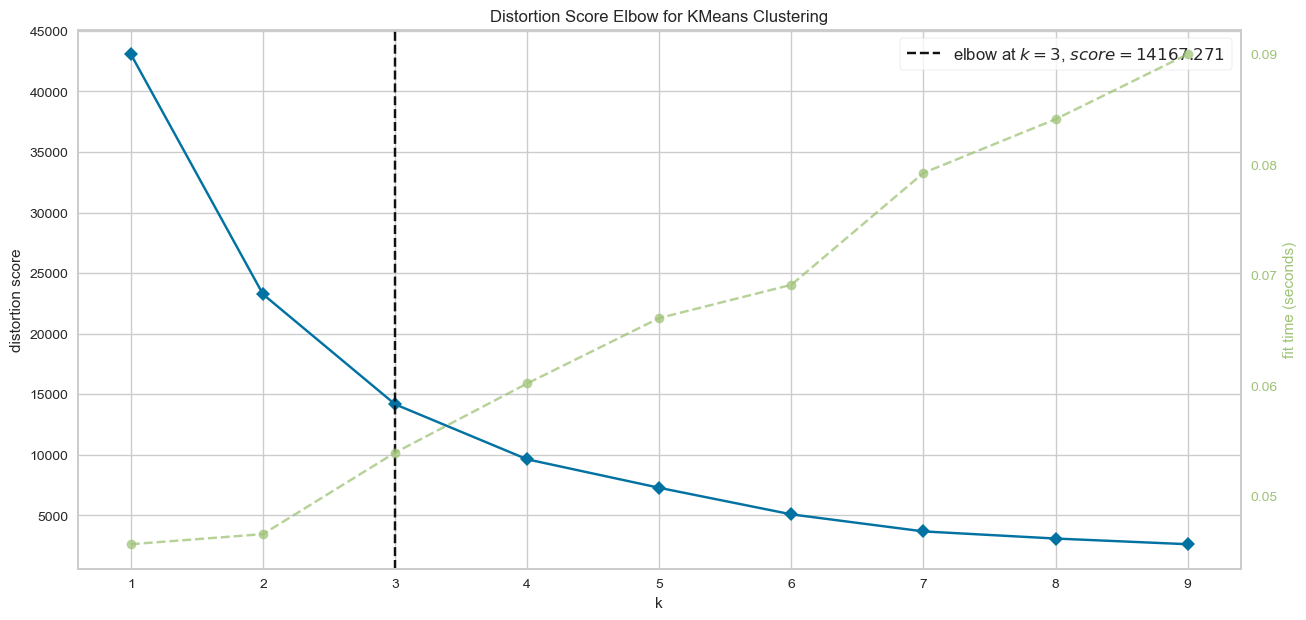

In [16]:
plt.rcParams["figure.figsize"] = (15, 7)

visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1, 10))
visualizer.fit(X)
visualizer.poof();

**Spotlights** 

This graph automatically identifies the optimal elbow point for you. As illustrated, this is the juncture at which increasing the number of clusters results in diminishing returns in performance. The dashed green line represents the training time required for the model at each specified cluster value.

### Utilize silhouette analysis to identify the most suitable number of clusters.


With 2 clusters:
   - Average silhouette score: 0.5846
Number of houses in cluster 0 = 16815
Number of houses in cluster 1 = 4794

With 3 clusters:
   - Average silhouette score: 0.6075
Number of houses in cluster 0 = 8938
Number of houses in cluster 1 = 10932
Number of houses in cluster 2 = 1739

With 4 clusters:
   - Average silhouette score: 0.6283
Number of houses in cluster 0 = 5522
Number of houses in cluster 1 = 10932
Number of houses in cluster 2 = 1665
Number of houses in cluster 3 = 3490

With 5 clusters:
   - Average silhouette score: 0.7187
Number of houses in cluster 0 = 5522
Number of houses in cluster 1 = 8649
Number of houses in cluster 2 = 1665
Number of houses in cluster 3 = 3490
Number of houses in cluster 4 = 2283


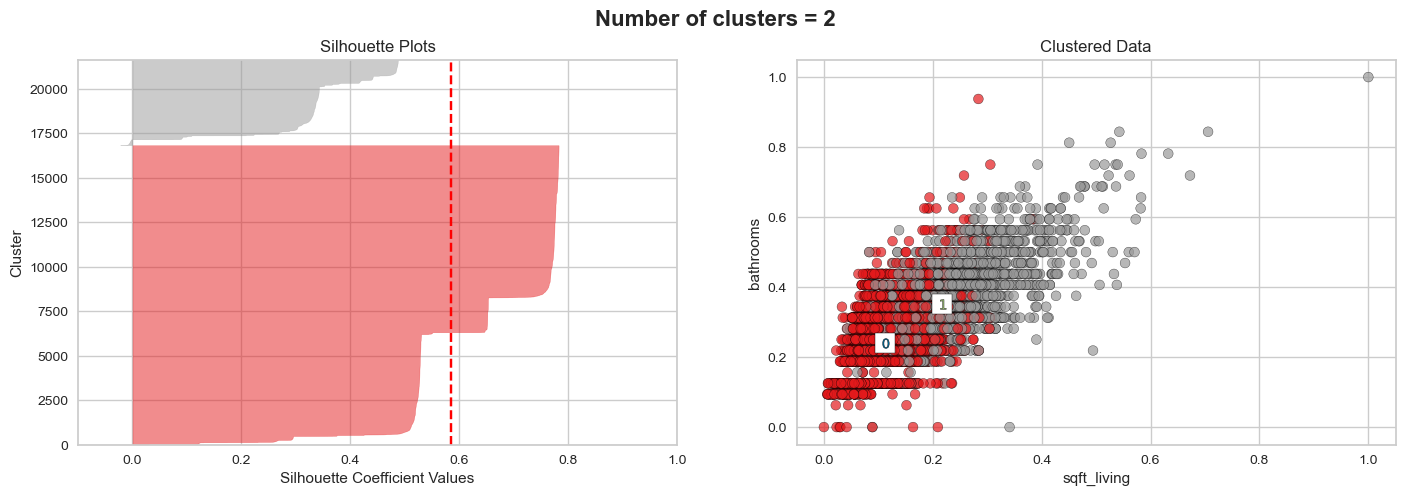

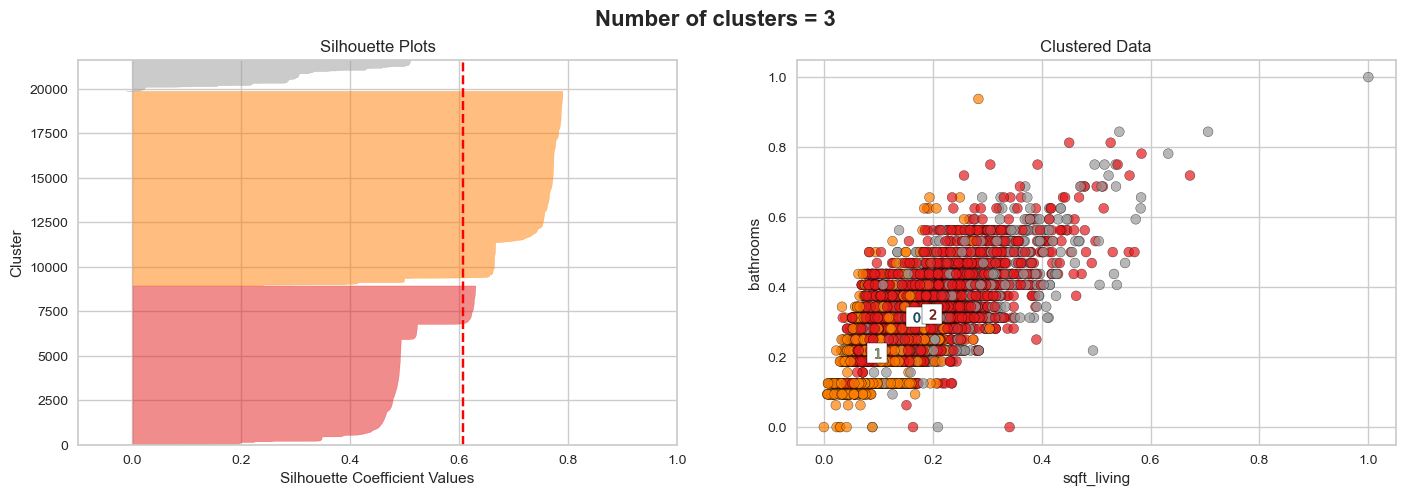

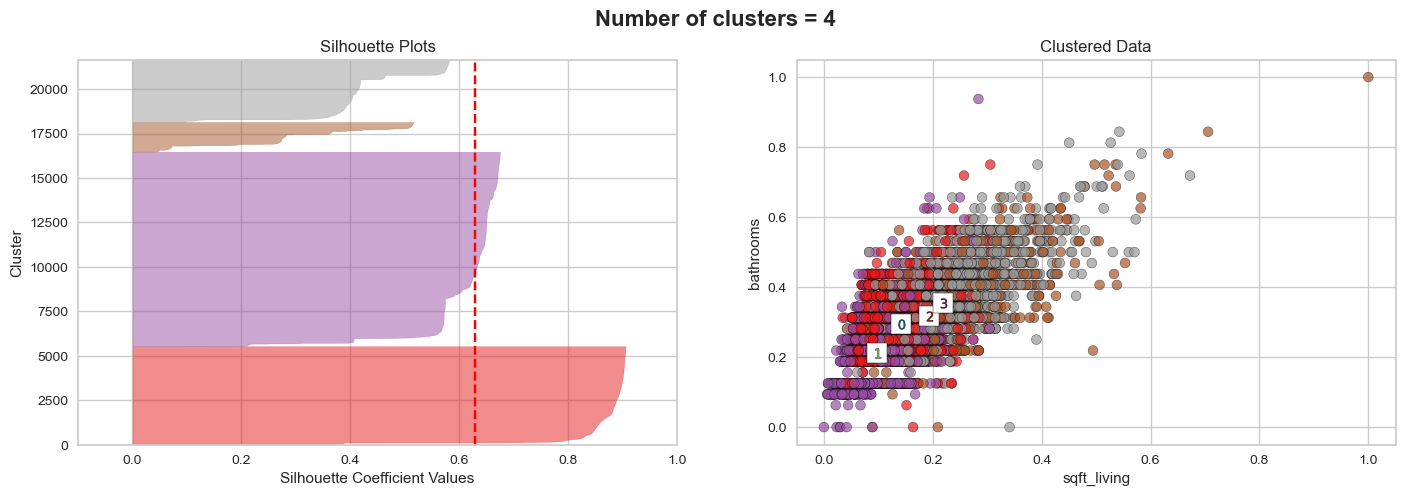

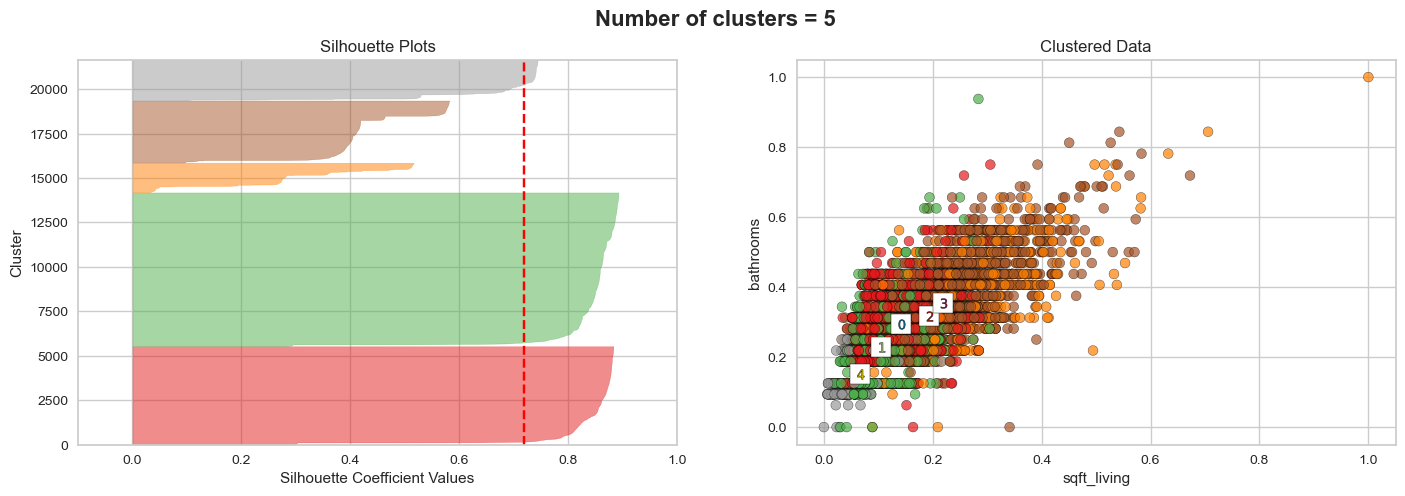

The highest score (0.7187) was obtained using 5 centers.


In [17]:
# A range of the number of clusters to test.
range_of_clusters = [2, 3, 4, 5]

high_score = 0
optimum_clusters = 0

for n in range_of_clusters:

    # Generate k-means model and assign clusters to data.
    kmeans = KMeans(n, random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_average = silhouette_score(X, clusters)

    print("\nWith {} clusters:".format(n))
    print("   - Average silhouette score: {:.4f}".format(silhouette_average))

    for i in range(n):
        number_in_clusters = np.count_nonzero(clusters == i)
        print("Number of houses in cluster {} = {}".format(i, number_in_clusters))

    # Note the high score.
    if silhouette_average > high_score:
        high_score = silhouette_average
        optimum_clusters = n

    # Ploting prep.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(17, 5)

    # Left SIde - SILHOUETTE PLOTS

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n + 1) * 10])

    silhouette = SilhouetteVisualizer(KMeans(n, random_state=42), ax=ax1, colors="Set1")
    silhouette.fit(X)

    # Axis labels.
    ax1.set_title("Silhouette Plots")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster")

    # Right Side - SCATTER PLOTS

    # Clusters captions.
    centers = kmeans.cluster_centers_

    # Graph the first two features.
    ax2.scatter(
        X["sqft_living"],
        X["bathrooms"],
        marker="o",
        alpha=0.7,
        c=clusters,
        cmap="Set1",
        s=50,
        edgecolor="black",
    )

    # Disply box at the center of every cluster with the cluster number inside.
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="s",
        c="white",
        alpha=1.0,
        s=200,
        edgecolor="black",
    )

    for i, center in enumerate(centers):
        ax2.scatter(
            center[0], center[1], marker="$%d$" % i, alpha=1.0, s=50, edgecolor="black"
        )

    # Axis labels.
    ax2.set_title("Clustered Data")
    ax2.set_xlabel(X.columns[0])
    ax2.set_ylabel(X.columns[1])
    plt.suptitle(("Number of clusters = %d" % n), fontsize=16, fontweight="bold")

plt.show()

print(
    "The highest score ({:.4f}) was obtained using {} centers.".format(
        high_score, optimum_clusters
    )
)

**Spotlights** 

The model featuring five clusters seems to achieve the highest score.

- The silhouette coefficient for each training iteration, represented by different values of k, is illustrated as a dashed red line on the silhouette plot.
- The silhouettes indicate both the relative size of each cluster and the silhouette coefficient specific to that cluster.
- A scatter plot visualizes the clusters based on the relationship between square footage and the number of bathrooms.
- It is important to note that the clusters in the scatter plots may overlap, as they depict a multi-dimensional model in a two-dimensional format, providing only a partial view of the clustering based on these two features.
- Nevertheless, some discernible patterns emerge when analyzing these features; for instance, in the scenario where k equals 2, cluster 1 (gray) tends to encompass homes with less living space and fewer bathrooms, while cluster 0 (red) generally contains homes with greater living space and more bathrooms.

The silhouette method suggests that the optimal number of clusters is five, as this configuration yields the highest silhouette coefficient. While this finding does not completely coincide with the results from the elbow method, it is important to note that neither approach is universally superior for every situation. In this case, the results from the silhouette analysis will be adopted as the definitive number of clusters to use.

### Apply the determined optimal number of clusters to illustrate the different groups of houses.

In [20]:
optimal_clusters = generate_clusters(optimum_clusters, X)

"""To incorporate the clusters, add them as a new column within the existing dataset."""
optimally_clustered_houses = df.assign(cluster=optimal_clusters)


map_datapoints(optimally_clustered_houses, "Houses Clustered by Multiple Features")